PCA
2.840030305940164
3.583513293441894
0.97627906102358
PCA
3.0714248609316837
3.7461468374206204
0.9740771092664465


<Figure size 4000x12000 with 0 Axes>

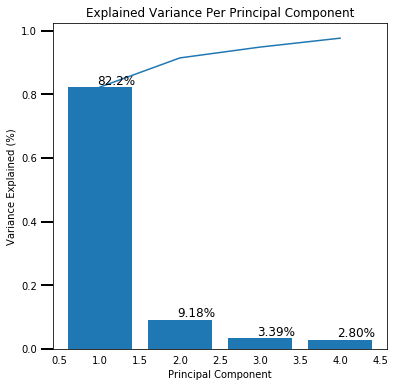

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scikitplot.decomposition import plot_pca_component_variance

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# from helper_functions import show_images, do_pca, scree_plot, plot_component

fig = plt.figure(figsize=(20,60),dpi=200)

df = pd.read_csv('data/test6.csv')
# print(df.columns.values)
l = df['BL']
g = np.array([])
y = []

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(1,num_components+1)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

for i in range(5,7):
    g = df[df.columns.values[:i+1]]
    # print(g.name)
    # g*=g*l
    ww = df[df.columns.values[-1]]
    # for i in range(1,10):
    #     g.append(df[df.columns[i]])

    x_train,x_test,y_train,y_test = train_test_split(g,ww,test_size=0.2, random_state=15)

    ss_x = StandardScaler()
    ss_y = StandardScaler()

    x_train = ss_x.fit_transform(x_train)
    x_test = ss_x.transform(x_test)
    y_train = ss_y.fit_transform(y_train.values.reshape(-1,1))
    y_test = ss_y.transform(y_test.values.reshape(-1,1))

    pca = PCA(n_components='mle')


    pca.fit(x_train)
    if(i>0):
        x_train = pca.transform(x_train)

    l_model = LinearRegression()
    l_model.fit(x_train,y_train)
    if(i>0):
        y_pred = l_model.predict(pca.transform(x_test))
    else:
        y_pred = l_model.predict(x_test)
    print('PCA')
    print(mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_pred)))
    print(mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_pred))**0.5)
    print(r2_score(y_test,y_pred))
    
    scree_plot(pca)
    
#     plot_pca_component_variance(pca, target_explained_variance=0.9)
#     x_ticks_label = ['{}'.format(j+1) for j in range(len(g))]
#     plt.xticks(x,x_ticks_label,rotation=45)
#     plt.show()

# print(r2_score(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_pred)))

    


In [4]:
set_tick_params?

Object `set_tick_params` not found.
